# Análisis del dataset de Metro

In [ ]:
!pip install seaborn

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
filecsv = 'productos_20241113-130245.csv'
df = pd.read_csv(filecsv, sep=',', low_memory=False)

In [16]:
df.shape

(18346, 34)

In [17]:
campos = ['product_id', 'product_name', 'brand', 'brand_id', 'brand_image_url', 'category_id', 'product_title', 'metatag_description', 'categories_text', 'categories_ids', 'link', 'vendido_por', 'descripcion_producto', 'presentacion', 'presentacion_empaque', 'pack', 'porcion_sugerida', 'azucares_porcion', 'carbohidratos_porcion', 'descripcion_nutricional', 'grasas_porcion', 'advertencias_consumo', 'item_id', 'ean', 'image_url', 'value', 'is_available', 'available_quantity', 'price', 'list_price', 'price_without_discount', 'price_valid_until', 'created', 'product_uri_json']

df.columns = campos

## Eliminar columnas que no se utilizarán
1. product_id
2. brand
3. brand_id
4. brand_image_url
5. category_id
6. metatag_description
7. categories_ids
8. item_id
9. ean
10. is_available
11. price_valid_until
12. created
13. product_uri_json
14. price_without_discount
15. list_price

In [18]:
df.drop(['product_id', 'product_title','brand', 'brand_id', 'brand_image_url', 'category_id', 'metatag_description', 'categories_ids', 'item_id', 'ean', 'is_available',  'pack', 'presentacion', 'presentacion_empaque', 'porcion_sugerida',  'azucares_porcion',  'carbohidratos_porcion', 'image_url','descripcion_nutricional', 'grasas_porcion', 'advertencias_consumo', 'price_valid_until', 'created', 'product_uri_json', 'price_without_discount', 'available_quantity','value', 'list_price', 'vendido_por'], axis=1, inplace=True)

df.columns.to_list()

['product_name', 'categories_text', 'link', 'descripcion_producto', 'price']

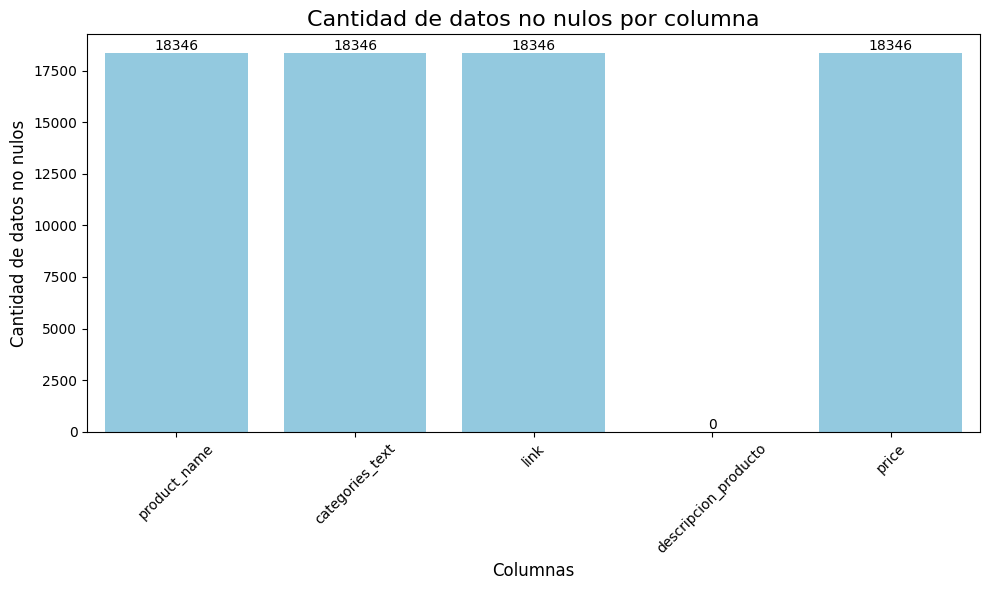

In [20]:
# Calcular la cantidad de datos no nulos por columna
non_null_counts = df.notnull().sum()

# Convertirlo en un DataFrame para facilitar el trabajo con Seaborn
non_null_df = non_null_counts.reset_index()
non_null_df.columns = ['Column', 'NonNullCount']

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=non_null_df, x='Column', y='NonNullCount', color='skyblue')  # Cambiamos `palette` por `color`

# Mostrar valores en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')

plt.title('Cantidad de datos no nulos por columna', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de datos no nulos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### La columna "descripcion_producto" no tiene información

## Limpieza de datos

In [21]:
marketplace = 'Metro'
df['descripcion_producto'] = df['descripcion_producto'].fillna(marketplace)
df['source'] = marketplace

In [22]:
def clean_categories(texto: str)-> str:
    categories = texto.replace('[', '').replace(']', '').replace("'", '')
    categories = categories.replace('/', ',').replace(',,', ',')
    categories = categories.replace(', ,', ',')
    return categories

def categories_to_list(texto: str)-> list:
    lista = list(dict.fromkeys(texto.split(',')))
    lista_limpia = list(filter(lambda x: x != '', lista))
    return lista_limpia
    
df['categories2'] = df['categories_text'].apply(clean_categories)
df['categories'] = df['categories2'].apply(categories_to_list)
df.drop(['categories_text', 'categories2'], axis=1, inplace=True)

In [23]:
import re

reemplazar = ['Importante destacar', 'Descripción del producto']

eliminar  = ['¡Conoce las distintas opciones', 
             'Otro punto importante es', 
             '¡Realiza tus combinaciones', 
             'Complementa tus', 
             'Finalmente, ', 
             'Finalmente ', 
             'Sin embargo, ',
             'Por ello',
             'Ingresa a la página',
             'La imagen es sólo referencial',
             'Imagen referencial',
             'En plazaVea ',
             'Complenta tus ',
             'En la web de ',
             'Encuentra más']

def clean_description(texto: str)-> str:
    if texto is not None:
        nuevo_texto = texto
        for palabra in reemplazar:
            nuevo_texto = nuevo_texto.replace(palabra, '.')
            nuevo_texto = nuevo_texto.replace('\n', '')
        
        for frase in eliminar:
            nuevo_texto = re.sub(frase + '.*', '', nuevo_texto, flags=re.DOTALL)
                       
        return nuevo_texto
    else:
        return texto
    
df['descripcion_producto'] = df['descripcion_producto'].apply(clean_description)

In [21]:
# tempo = df.query("`descripcion_producto` != 'plazaVea'")['descripcion_producto'].sample(n=10)
# for t in tempo:
#     print(t, end="\n\n")

In [26]:
df.sample(n=45)
df.head(50)

,product_name,link,descripcion_producto,price,source,categories
0,Fresa Deshidratada Natifrut x kg,https://www.metro.pe/fresa-deshidratada-natifr...,Metro,260.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
1,Pecanas Saladas x kg,https://www.metro.pe/pecanas-saladas-x-kg-1003...,Metro,189.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
2,Pecana Pelada x kg,https://www.metro.pe/pecana-pelada-x-kg-4711/p,Metro,149.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
3,Pecanas Acarameladas x kg,https://www.metro.pe/pecanas-acarameladas-x-kg...,Metro,125.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
4,Piña Deshidratada en Trozos Golden x kg,https://www.metro.pe/pina-deshidratada-en-troz...,Metro,118.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
5,Pistachos Salados x kg,https://www.metro.pe/pistachos-salados-x-kg-45...,Metro,116.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
6,Castañas x kg,https://www.metro.pe/castanas-x-kg-4714/p,Metro,115.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
7,Cashews Salados x kg,https://www.metro.pe/cashews-salados-x-kg/p,Metro,109.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
8,Nuez Pelada Wong x kg,https://www.metro.pe/nuez-pelada-wong-x-kg-2/p,Metro,108.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
9,Almendras Saladas x kg,https://www.metro.pe/almendras-saladas-x-kg/p,Metro,90.00,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"


In [23]:
!pip install pyarrow fastparquet --quiet

In [25]:
# Guardar el dataset limpio como parquet
df.to_parquet('metro.parquet')

In [27]:
df = pd.read_parquet('metro.parquet')

print("=== Información básica del archivo Parquet ===")
print("\nPrimeras 5 filas:")
print(df.head())

print("\nInformación del DataFrame:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nColumnas disponibles:")
for col in df.columns:
    print(f"- {col}")

print(f"\nTotal de filas: {len(df)}")
   
df

=== Información básica del archivo Parquet ===

Primeras 5 filas:
                              product_name  \
0         Fresa Deshidratada Natifrut x kg   
1                     Pecanas Saladas x kg   
2                       Pecana Pelada x kg   
3                Pecanas Acarameladas x kg   
4  Piña Deshidratada en Trozos Golden x kg   

                                                link descripcion_producto  \
0  https://www.metro.pe/fresa-deshidratada-natifr...                Metro   
1  https://www.metro.pe/pecanas-saladas-x-kg-1003...                Metro   
2     https://www.metro.pe/pecana-pelada-x-kg-4711/p                Metro   
3  https://www.metro.pe/pecanas-acarameladas-x-kg...                Metro   
4  https://www.metro.pe/pina-deshidratada-en-troz...                Metro   

   price source                                 categories  
0  260.0  Metro  [Frutas y Verduras, Frutas, Frutos Secos]  
1  189.0  Metro  [Frutas y Verduras, Frutas, Frutos Secos]  
2  149.0  M

,product_name,link,descripcion_producto,price,source,categories
0,Fresa Deshidratada Natifrut x kg,https://www.metro.pe/fresa-deshidratada-natifr...,Metro,260.0,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
1,Pecanas Saladas x kg,https://www.metro.pe/pecanas-saladas-x-kg-1003...,Metro,189.0,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
2,Pecana Pelada x kg,https://www.metro.pe/pecana-pelada-x-kg-4711/p,Metro,149.0,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
3,Pecanas Acarameladas x kg,https://www.metro.pe/pecanas-acarameladas-x-kg...,Metro,125.0,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
4,Piña Deshidratada en Trozos Golden x kg,https://www.metro.pe/pina-deshidratada-en-troz...,Metro,118.0,Metro,"[Frutas y Verduras, Frutas, Frutos Secos]"
...,...,...,...,...,...,...
18341,Colgante Krea Llave Palacio Navidad 2024 Surtido,https://www.metro.pe/colgante-krea-llave-palac...,Metro,1.6,Metro,"[Navidad, Decoración Navideña, Colgantes para ..."
18342,Colgante Krea Pack 2 Estrellas Azules Fiesta N...,https://www.metro.pe/colgante-krea-pack-2-estr...,Metro,1.6,Metro,"[Navidad, Decoración Navideña, Colgantes para ..."
18343,Guirnalda Krea Hebras Viaje Navidad 2024,https://www.metro.pe/guirnalda-krea-hebras-via...,Metro,1.6,Metro,"[Navidad, Decoración Navideña, Guirnaldas Navi..."
18344,Colgante Krea Azul Navy Navidad 2023 5cm,https://www.metro.pe/colgante-krea-azul-navy-n...,Metro,1.0,Metro,"[Navidad, Decoración Navideña, Colgantes para ..."
